In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install quandl
import quandl

In [ ]:
data = quandl.get("NSE/TATAGLOBAL")
data.shape

(2100, 7)

In [ ]:
data.tail(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-12-21,211.00,219.60,210.80,215.00,215.40,5654362.0,12257.27
2018-12-24,215.55,224.00,215.40,219.05,219.05,5808490.0,12802.57
2018-12-26,220.40,220.40,212.40,217.95,218.55,1598566.0,3456.42
2018-12-27,221.80,224.90,215.20,220.10,220.05,9509683.0,20912.50
2018-12-28,221.75,223.30,219.55,220.75,220.80,2263147.0,5006.86
2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50


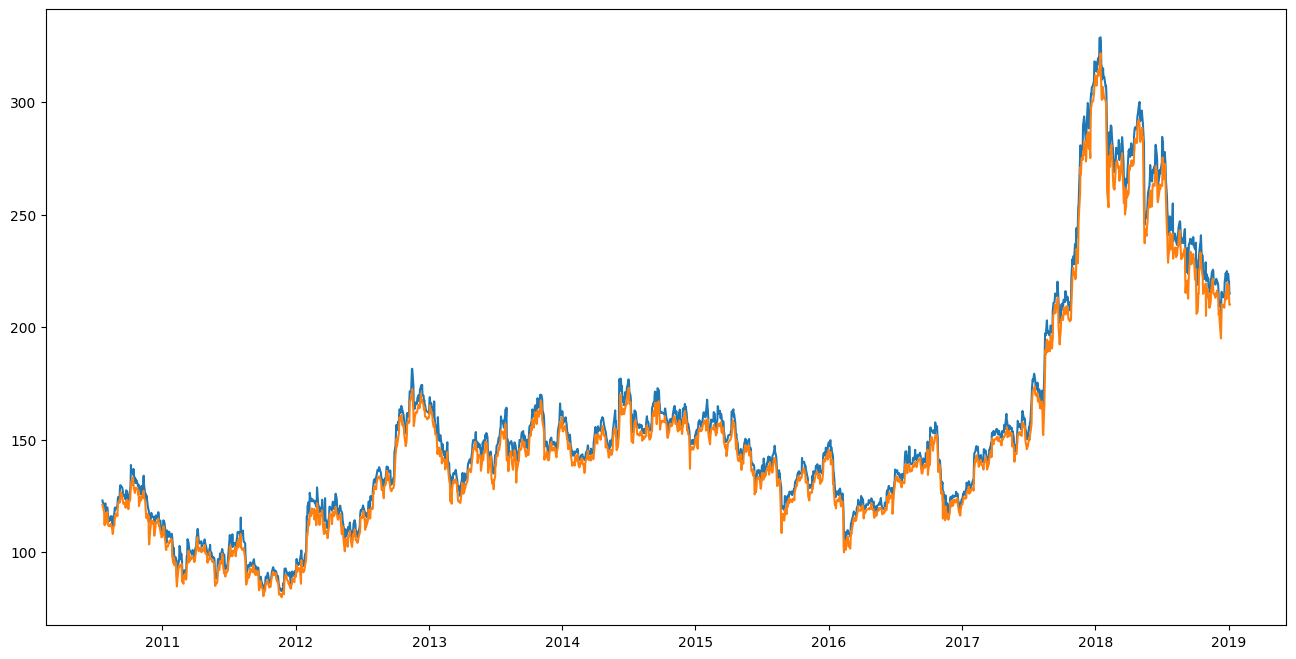

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['High'],label='HIGH price')
plt.plot(data['Low'],label='LOW price')

In [ ]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

In [ ]:
x = data[['Open - Close' , 'High - Low']]
x.tail()

,Open - Close,High - Low
Date,,
2018-12-31,2.60,4.80
2019-01-01,0.85,3.00
2019-01-02,4.40,6.75
2019-01-03,4.90,5.45
2019-01-04,-3.20,4.90


In [ ]:
y = np.where(data['Close'].shift(-1)>data['Close'],'Buy','Sell')
y

array(['Sell', 'Sell', 'Sell', ..., 'Sell', 'Buy', 'Sell'], dtype='<U4')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=44)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
parameters = {'n_neighbors' :[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, parameters, cv=5)

In [ ]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Accuracy
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print("Training data accuracy =  ", accuracy_train*100 ,"%")
print("Test data accuracy = ", accuracy_test*100,"%")

Training data accuracy =   65.58730158730158 %
Test data accuracy =  50.857142857142854 %


In [ ]:
prediction_classification = model.predict(x_test)
actual_prediction_data = pd.DataFrame({"Actual Decision":y_test, "Predicted Decision":prediction_classification})

In [ ]:
actual_prediction_data.head(10)

,Actual Decision,Predicted Decision
0,Sell,Buy
1,Buy,Buy
2,Buy,Sell
3,Buy,Buy
4,Sell,Sell
5,Sell,Sell
6,Sell,Buy
7,Sell,Sell
8,Sell,Buy
9,Buy,Sell


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Actual Decision').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Predicted Decision').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Predicted Decision'].value_counts()
    for x_label, grp in _df_2.groupby('Actual Decision')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Actual Decision')
_ = plt.ylabel('Predicted Decision')

In [ ]:
y = data['Close']
y

Date
2010-07-21    121.55
2010-07-22    120.90
2010-07-23    120.65
2010-07-26    117.60
2010-07-27    118.65
               ...  
2018-12-31    219.40
2019-01-01    219.10
2019-01-02    214.60
2019-01-03    210.05
2019-01-04    213.80
Name: Close, Length: 2100, dtype: float64

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [ ]:
x_train_regression, x_test_regression, y_train_regression, y_test_regression = train_test_split(x, y, test_size = 0.25, random_state=25)
#grid_search for finding best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_regression = neighbors.KNeighborsRegressor()
model_regression = GridSearchCV(knn_regression, params, cv=5)

#fitting the model
model_regression.fit(x_train_regression, y_train_regression)
predictions = model_regression.predict(x_test_regression)

In [ ]:
print(predictions)

[133.54666667 185.49666667 126.5        125.96666667 147.71
 118.08333333 176.18       171.03       136.99666667 174.60333333
 149.34333333 176.99333333 120.63       142.37333333 141.12333333
 136.86333333 120.16333333 195.18666667 139.2        116.36
 132.13       128.14333333 114.76333333 132.97       138.12
 228.53       174.66333333 122.61       167.13333333 127.39
 126.29333333 131.96333333 150.28       160.39       153.11
 129.67       134.70666667 222.38666667 136.33666667 132.25666667
 138.58333333 166.49666667 127.22333333 181.51       139.51
 147.39333333 131.02       134.81666667 133.15666667 150.72333333
 142.93333333 191.61       146.26333333 132.04       133.36
 127.30333333 125.62       171.63       143.62333333 121.02
 141.60333333 157.98666667 141.34333333 123.48333333 139.63
 185.43       124.24333333 163.59       136.44333333 135.84
 195.64333333 123.93333333 138.91333333 134.81333333 135.69
 190.30666667 127.38       190.67666667 140.07666667 148.63666667
 157.84333

In [ ]:
Prediction_comparison = pd.DataFrame({'Actual Close Value':y_test_regression,'Predicted Close Value':predictions})
Prediction_comparison.head(10)

,Actual Close Value,Predicted Close Value
Date,,
2015-07-24,140.80,133.546667
2018-12-26,218.55,185.496667
2017-02-01,130.10,126.500000
2016-01-01,146.40,125.966667
2012-11-13,171.45,147.710000
2015-10-16,134.00,118.083333
2015-03-04,158.35,176.180000
2013-03-14,134.35,171.030000
2012-08-07,129.85,136.996667


from matplotlib import pyplot as plt
_df_45['Actual Close Value'].plot(kind='hist', bins=20, title='Actual Close Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Predicted Close Value'].plot(kind='hist', bins=20, title='Predicted Close Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47.plot(kind='scatter', x='Actual Close Value', y='Predicted Close Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['Actual Close Value'].plot(kind='line', figsize=(8, 4), title='Actual Close Value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_49['Predicted Close Value'].plot(kind='line', figsize=(8, 4), title='Predicted Close Value')
plt.gca().spines[['top', 'right']].set_visible(False)